In [13]:
# Importing Pandas for Data Analysis
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt


# Creating a DataFrame with Pandas
reviews = pd.read_csv(r"udemy_reviews.csv", parse_dates=['Timestamp'])

reviews.head()

,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


## Agreggating and Ploting Average Ratings By Day

### Grouping information By Day

In [38]:
day_avg = reviews.groupby(['Timestamp']).mean()
day_avg.head()

,Rating
Timestamp,
2018-01-01 01:01:16+00:00,5.0
2018-01-01 01:05:26+00:00,5.0
2018-01-01 01:08:11+00:00,5.0
2018-01-01 01:09:56+00:00,5.0
2018-01-01 01:11:26+00:00,4.0


In [39]:
# But just doing that above, we gets all the same values from the dataframe 
#beacuse .groupby method is not finding identical values
# So, let's create identical values into de dataframe based in the timestamp information

reviews['Day'] = reviews['Timestamp'].dt.date

# Let's visualize the new column day that we've created 
reviews.head()

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


In [41]:
# Now let's group again. This time using te column that we know that has identical values to be grouped out
day_avg = reviews.groupby(['Day']).mean()
day_avg.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


### Let's plot the Daily Average Ratings 

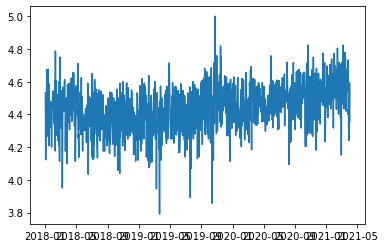

In [42]:
# plot() method receives two arguments: values for x and y axis

plt.plot(day_avg.index, day_avg['Rating'])

### Fixing the plot to make it more readible 

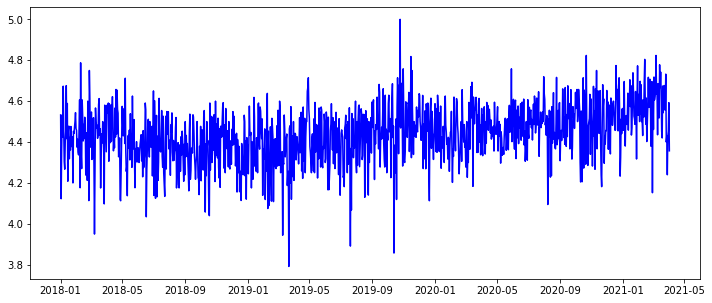

In [43]:
plt.figure(figsize= (12, 5))
plt.plot(day_avg.index, day_avg['Rating'], 'b-')

# For more plot style, check the official documentation of pyplot
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot


## Agreggating and Ploting Average Ratings By Week

### Grouping information By week

In [54]:
# Let's create a column  with the week of the year
reviews['Week'] = reviews['Timestamp'].dt.week 
reviews['Week']

C:\Users\ANTONI~1\AppData\Local\Temp/ipykernel_2976/1071088761.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  reviews['Week'] = reviews['Timestamp'].dt.week


0        13
1        13
2        13
3        13
4        13
         ..
44995     1
44996     1
44997     1
44998     1
44999     1
Name: Week, Length: 45000, dtype: int64

In [55]:
reviews['Week'].max()

53

In [ ]:
# The way that python is presenting the week is unuseful for our study, because
# aparenteky what is doing is stacking all the information based on the number of the week
# without considering the difference between years 

# Usign the sintax below we can get separated info per each week

In [57]:
reviews['Week'] = reviews['Timestamp'].dt.strftime('%Y-%U')
reviews['Week']


0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [58]:
# As we can see below, the maximum value of the week this time is not 53 
#(the highest number that a year can have in total). Instead, we have a individual information 
# for the week number 13 of the 2021 year, and that's what we looking for

reviews['Week'].max()

'2021-13'

In [60]:
# Now, let's group by week
week_avg = reviews.groupby(['Week']).mean()
week_avg

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


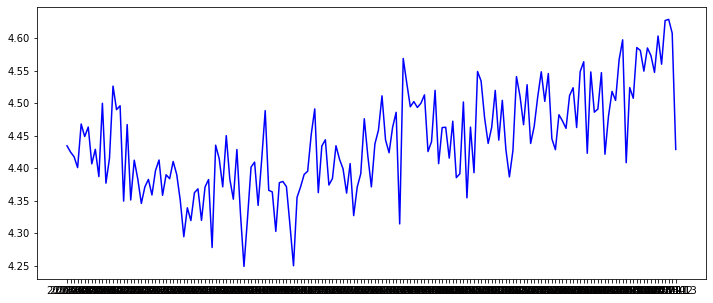

In [61]:
# Ploting ratings per week of each year
plt.figure(figsize= (12, 5))
plt.plot(week_avg.index, week_avg['Rating'], 'b-')

In [ ]:
# Even if this graphic shows the trend of the average ratings more clear and efficiently that
# the graphic of the ratings per day, we can go further and downsampling the data per month, 
# to improve the user experience showing a more clear graphic

## Agreggating and Ploting Average Ratings By Month 

In [63]:
# Let's start creating a column for storing each month of the different years
reviews['Month'] = reviews['Timestamp'].dt.strftime('%Y-%m')
reviews['Month']

0        2021-04
1        2021-04
2        2021-04
3        2021-04
4        2021-04
          ...   
44995    2018-01
44996    2018-01
44997    2018-01
44998    2018-01
44999    2018-01
Name: Month, Length: 45000, dtype: object

In [65]:
# Now, let's group by month 
month_avg = reviews.groupby(['Month']).mean()
month_avg.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


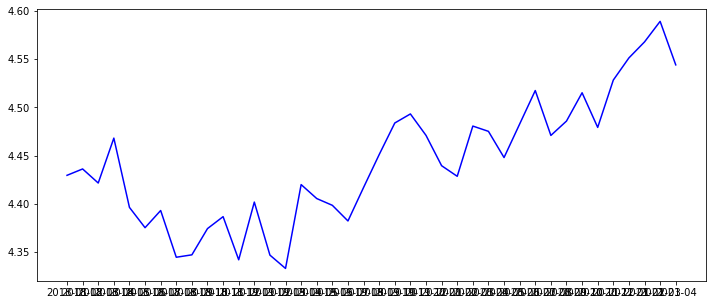

In [66]:
# Ploting ratings per week of each year
plt.figure(figsize= (12, 5))
plt.plot(month_avg.index, month_avg['Rating'], 'b-')

### Average Rating by Month by Course

In [70]:
reviews['Month'] = reviews['Timestamp'].dt.strftime('%Y-%m')
month_course_avg = reviews.groupby(['Month', 'Course Name']).mean()

# Visualize the first 20 records of the new Dataframe
month_course_avg[:20]


Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
        The Python Mega Course: Build 10 Real World App...  4.457368
2018-02 100 Python Exercises I: Evaluate and Improve Yo...  4.250000
        Data Processing with Python                         4.205882
        Interactive Data Visualization with Python and ...  4.157895
        Learn GIS in One Hour                               4.437500
        Python for Beginners with Examples                  4.363095
        The Python Mega Course: Build 10 Real World App...  4.481070
2018-03 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Data Processing with Python                         4.281250
        Interactive Data Visualization with Python and ...  4.266667
        Learn GIS in One Hour                               4.166667
        Python for Beginners with Examples                  4.357143
        The Python Mega Course: Build 10 Real World App...  4.447037
2018-04 100 Python Exercises I: Evaluate and Improve Yo...  4.431034
        Data Processing with Python                         4.468750

### Creating a Pivot Table with unstack method to have a better structure of the data 

In [81]:
month_course_avg = reviews.groupby(['Month', 'Course Name'])['Rating'].mean().unstack()
month_course_avg[:15]

Course Name,100 Python Exercises I: Evaluate and Improve Your Skills,100 Python Exercises II: Evaluate and Improve Your Skills,Data Processing with Python,Interactive Data Visualization with Python and Bokeh,Learn GIS in One Hour,Python for Beginners with Examples,The Complete Python Course: Build 10 Professional OOP Apps,The Python Mega Course: Build 10 Real World Applications
Month,,,,,,,,
2018-01,4.353448,NaN,4.500000,4.285714,4.236842,4.355422,NaN,4.457368
2018-02,4.250000,NaN,4.205882,4.157895,4.437500,4.363095,NaN,4.481070
2018-03,4.500000,NaN,4.281250,4.266667,4.166667,4.357143,NaN,4.447037
2018-04,4.431034,NaN,4.468750,4.428571,4.250000,4.378947,NaN,4.507412
2018-05,4.358696,NaN,4.176471,4.107143,4.666667,4.362654,NaN,4.422085
2018-06,4.268293,NaN,4.631579,4.204545,4.333333,4.273876,NaN,4.421264
2018-07,4.589286,NaN,4.159091,4.065217,4.277778,4.330239,NaN,4.436156
2018-08,4.353659,NaN,4.411765,4.233333,4.100000,4.283388,NaN,4.376494
2018-09,4.238636,NaN,4.173913,4.500000,4.166667,4.247967,NaN,4.416413


### Creating a visualization for our new Month- Course name Average Ratings

<AxesSubplot:xlabel='Month'>

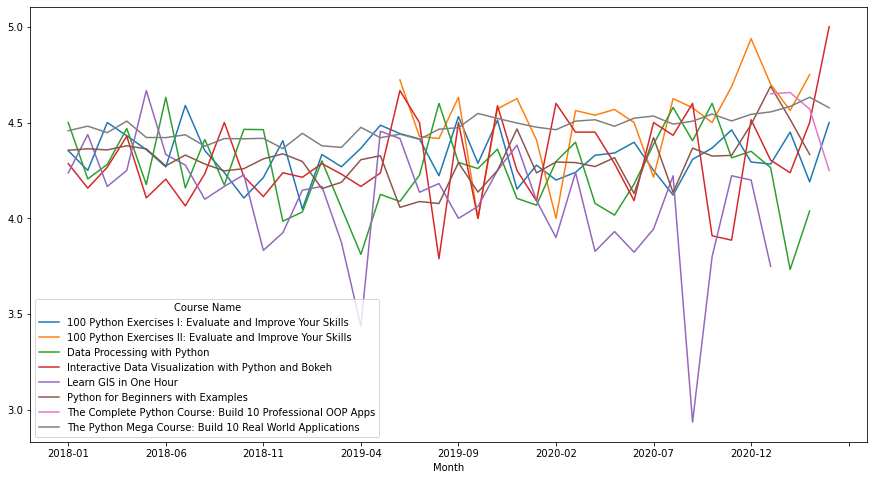

In [80]:
# This time we will use the plot() method directlty over the Dataframe and not as we did it before, 
# aplied over the plt library

month_course_avg.plot(figsize= (15, 8))


## Which Day People Leaves Better Comments? 

In [88]:
# First, let's create a column with the days of the week
reviews['Weekday'] = reviews['Timestamp'].dt.strftime('%A')
reviews.head()

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


### Getting the Rating for every day of the week

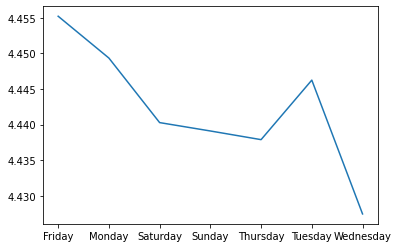

In [85]:
weekday_avg = reviews.groupby(['Weekday']).mean()

plt.plot(weekday_avg.index, weekday_avg['Rating'])

In [89]:
# Let's sort the result to have the days of the week in order
# What python is doing is sorting the results by an alphabetic order, 
# beacuse the names of the days of the week are currently strings
# Due that the .strftime() method produces an object type string

reviews['Daynumber'] = reviews['Timestamp'].dt.strftime('%w')
reviews.head()



,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5


TypeError: 'value' must be an instance of str or bytes, not a tuple

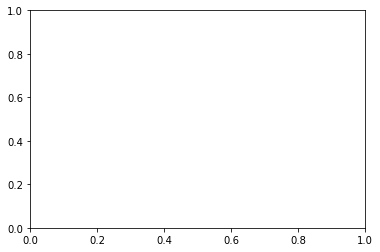

In [90]:
# having this new numeric values per each day of the week, we can sort the data again

weekday_avg = reviews.groupby(['Weekday', 'Daynumber']).mean()
weekday_avg = weekday_avg.sort_values('Daynumber')

plt.plot(weekday_avg.index, weekday_avg['Rating'])

### Solving the 'TypeError: 'value' must be an instance of str or bytes, not a tuple' error

In [93]:
# This error is happening because the Dataframe have 2 index (weekday and Daynumber)
weekday_avg.index

# For this reason the plot() method will be confused about what value plot over the X axis

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynumber'])

In [97]:
# We can solve the problem chosing one of the index to plot on X axis, like this

weekday_avg_index = weekday_avg.index.get_level_values(0)
weekday_avg_index

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')

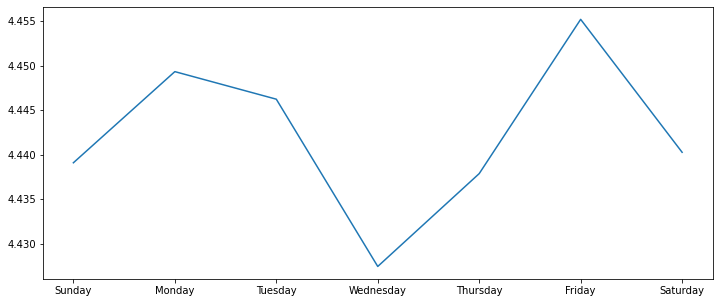

In [101]:
# Now we can use the expresion above as our argument for plotting over the X axis

plt.figure(figsize=[12, 5])
plt.plot(weekday_avg_index, weekday_avg['Rating'])

# And finally we can see the visualization with the days of the week in the regular order
